In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/kaggle/input/sleep-health-and-lifestyle/ss.csv')

# EDA

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.shape

(373, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                373 non-null    int64  
 1   Gender                   373 non-null    object 
 2   Age                      373 non-null    int64  
 3   Occupation               373 non-null    object 
 4   Sleep Duration           373 non-null    float64
 5   Quality of Sleep         373 non-null    int64  
 6   Physical Activity Level  373 non-null    int64  
 7   Stress Level             373 non-null    int64  
 8   BMI Category             373 non-null    object 
 9   Blood Pressure           373 non-null    object 
 10  Heart Rate               373 non-null    int64  
 11  Daily Steps              373 non-null    int64  
 12  Sleep Disorder           154 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.0+ KB


In [6]:
df.isnull().any()

Person ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep Duration             False
Quality of Sleep           False
Physical Activity Level    False
Stress Level               False
BMI Category               False
Blood Pressure             False
Heart Rate                 False
Daily Steps                False
Sleep Disorder              True
dtype: bool

In [7]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
df.duplicated().any().sum()

0

### Replacing Nan with 'No'
Sleep Disorder Nan Means they have no sleeping disorder,<br>
So I think I can replace the Nan valule with 'No'

In [9]:
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [10]:
df['Sleep Disorder'].value_counts()

Sleep Disorder
Sleep Apnea    77
Insomnia       77
Name: count, dtype: int64

In [11]:
df['Sleep Disorder']=df['Sleep Disorder'].fillna('No')

## Summary Statistics

In [12]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,187.000000,42.139410,7.129491,7.308311,59.128686,5.391421,70.171582,6816.353887
std,107.820066,8.640793,0.795139,1.195359,20.842589,1.772590,4.139704,1620.060932
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.000000,35.000000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.000000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.000000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,373.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Correlation Matrix

In [13]:
nu_col=['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps']

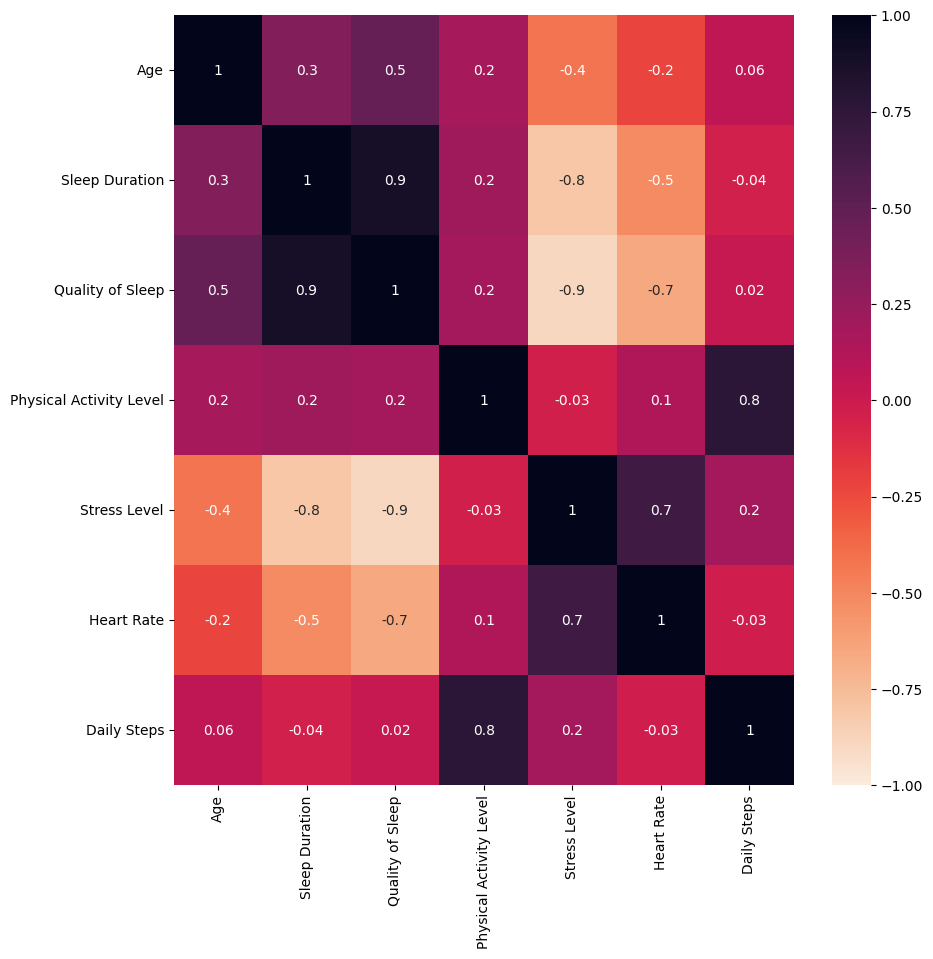

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df[nu_col].corr(),cmap='rocket_r',annot=True,fmt='0.1g',vmin=-1,vmax=1)
plt.show()

## Distribution of Gender

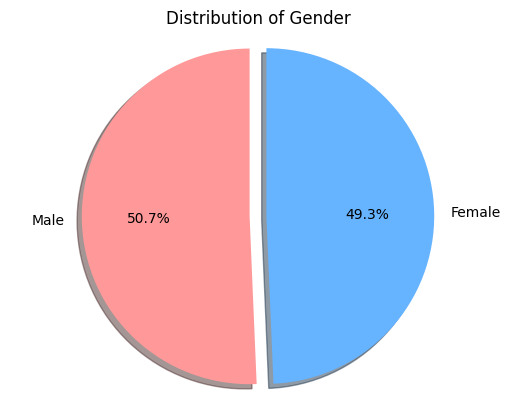

In [15]:

plt.pie(x=df['Gender'].value_counts(),labels=['Male','Female'],colors = ['#ff9999', '#66b3ff'],explode = (0.1, 0),autopct='%1.1f%%', shadow=True,startangle=90)
plt.axis('equal')

plt.title('Distribution of Gender')
plt.show()

## Distribution of Age

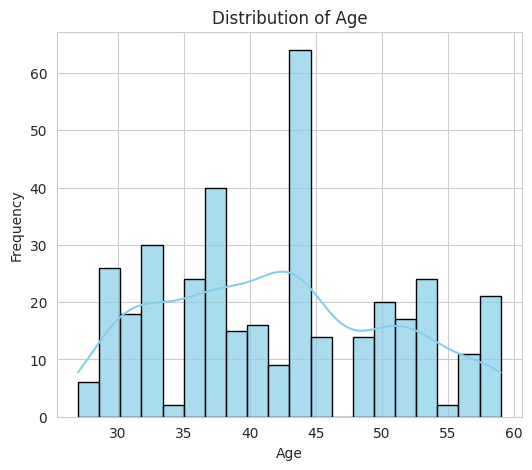

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


## Distribution of Sleep Duration

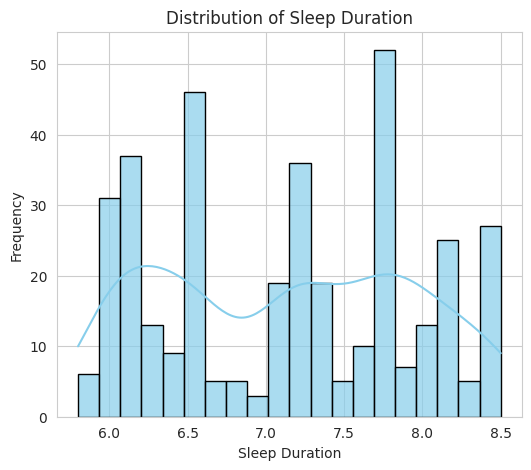

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 5))
sns.histplot(data=df, x='Sleep Duration', bins=20, kde=True, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.show()


## Age vs. Sleep Duration by Quality of Sleep

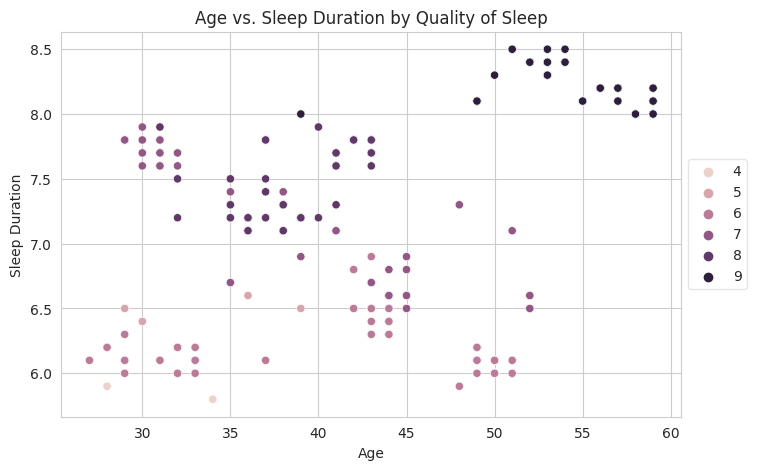

In [18]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Sleep Duration', hue='Quality of Sleep')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), framealpha=0.5)  # Adjust the transparency with framealpha

plt.title('Age vs. Sleep Duration by Quality of Sleep')

plt.show()


## Heart Rate vs. Sleep Duration by Sleep Disorder

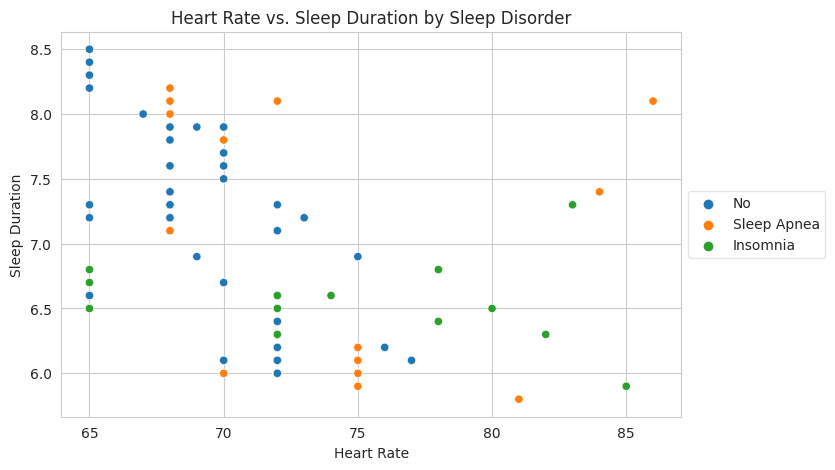

In [19]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Heart Rate', y='Sleep Duration', hue='Sleep Disorder')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), framealpha=0.5)  # Adjust the transparency with framealpha

plt.title('Heart Rate vs. Sleep Duration by Sleep Disorder')

plt.show()


## Physical Activity Level vs. Stress Level by Sleep Duration

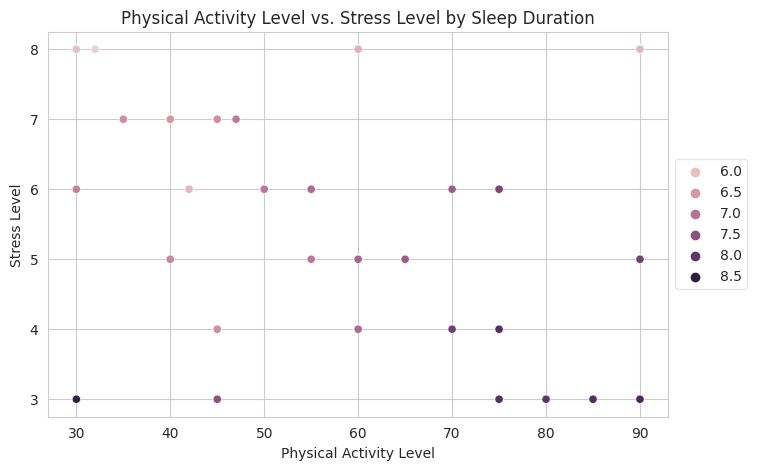

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Physical Activity Level', y='Stress Level', hue='Sleep Duration')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), framealpha=0.5)  # Adjust the transparency with framealpha

plt.title('Physical Activity Level vs. Stress Level by Sleep Duration')

plt.show()
	

## Occupation vs. Sleep Duration by Quality of Sleep

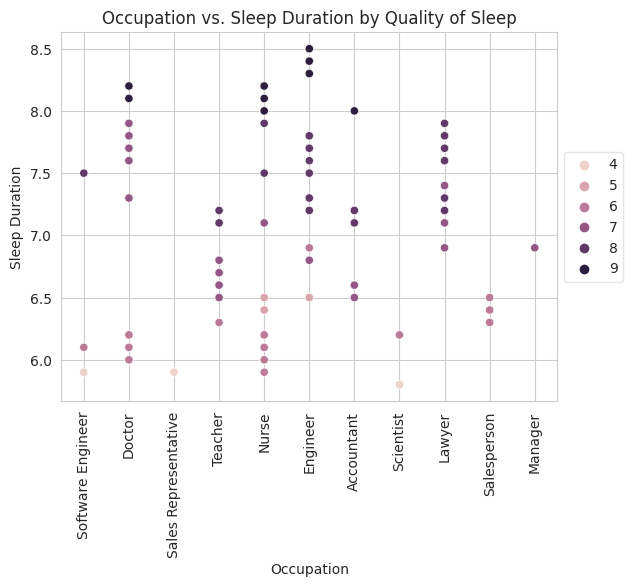

In [21]:
sns.scatterplot(data=df, x='Occupation', y='Sleep Duration', hue='Quality of Sleep')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), framealpha=0.5) 
plt.xticks(rotation=90)
plt.title('Occupation vs. Sleep Duration by Quality of Sleep')

plt.show()

In [22]:
occupation_sleep=df.groupby('Occupation')['Sleep Duration'].mean()
occupation_sleep

Occupation
Accountant              7.113514
Doctor                  6.970423
Engineer                7.987302
Lawyer                  7.410638
Manager                 6.900000
Nurse                   7.048611
Sales Representative    5.900000
Salesperson             6.403125
Scientist               6.000000
Software Engineer       6.750000
Teacher                 6.690000
Name: Sleep Duration, dtype: float64

## Average Sleep Duration by Occupation

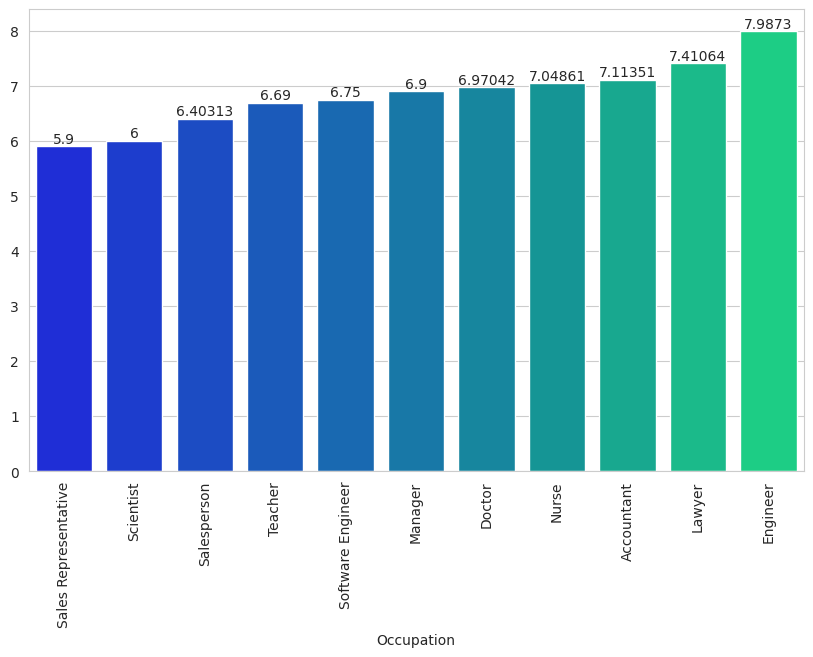

In [23]:
occupation_sleep=df.groupby('Occupation')['Sleep Duration'].mean().sort_values()
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df,x=occupation_sleep.index,y=occupation_sleep.values,palette='winter')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

## Average Sleep Quality by Occupation

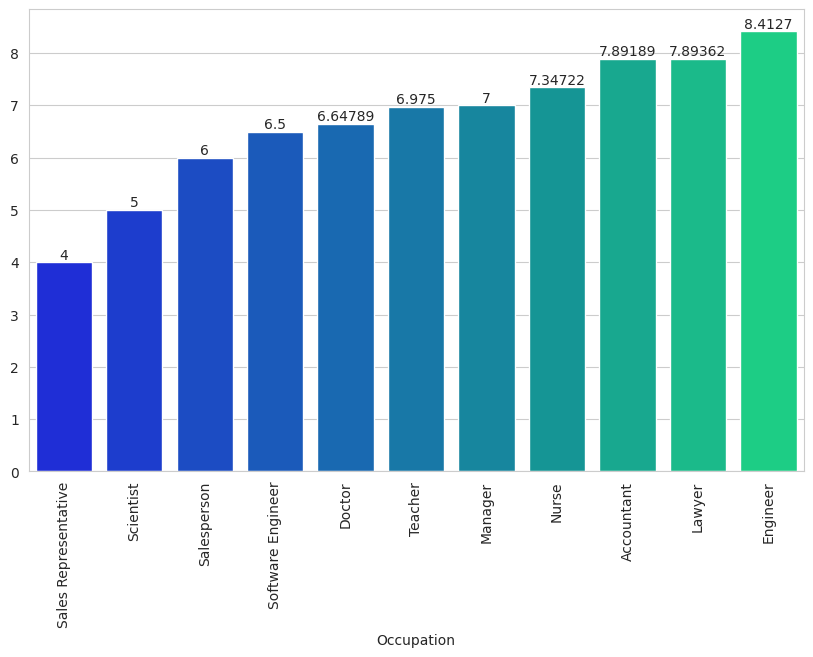

In [24]:
occupation_sleep=df.groupby('Occupation')['Quality of Sleep'].mean().sort_values()
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df,x=occupation_sleep.index,y=occupation_sleep.values,palette='winter')
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)
plt.show()

## Pair Plot by BMI Category

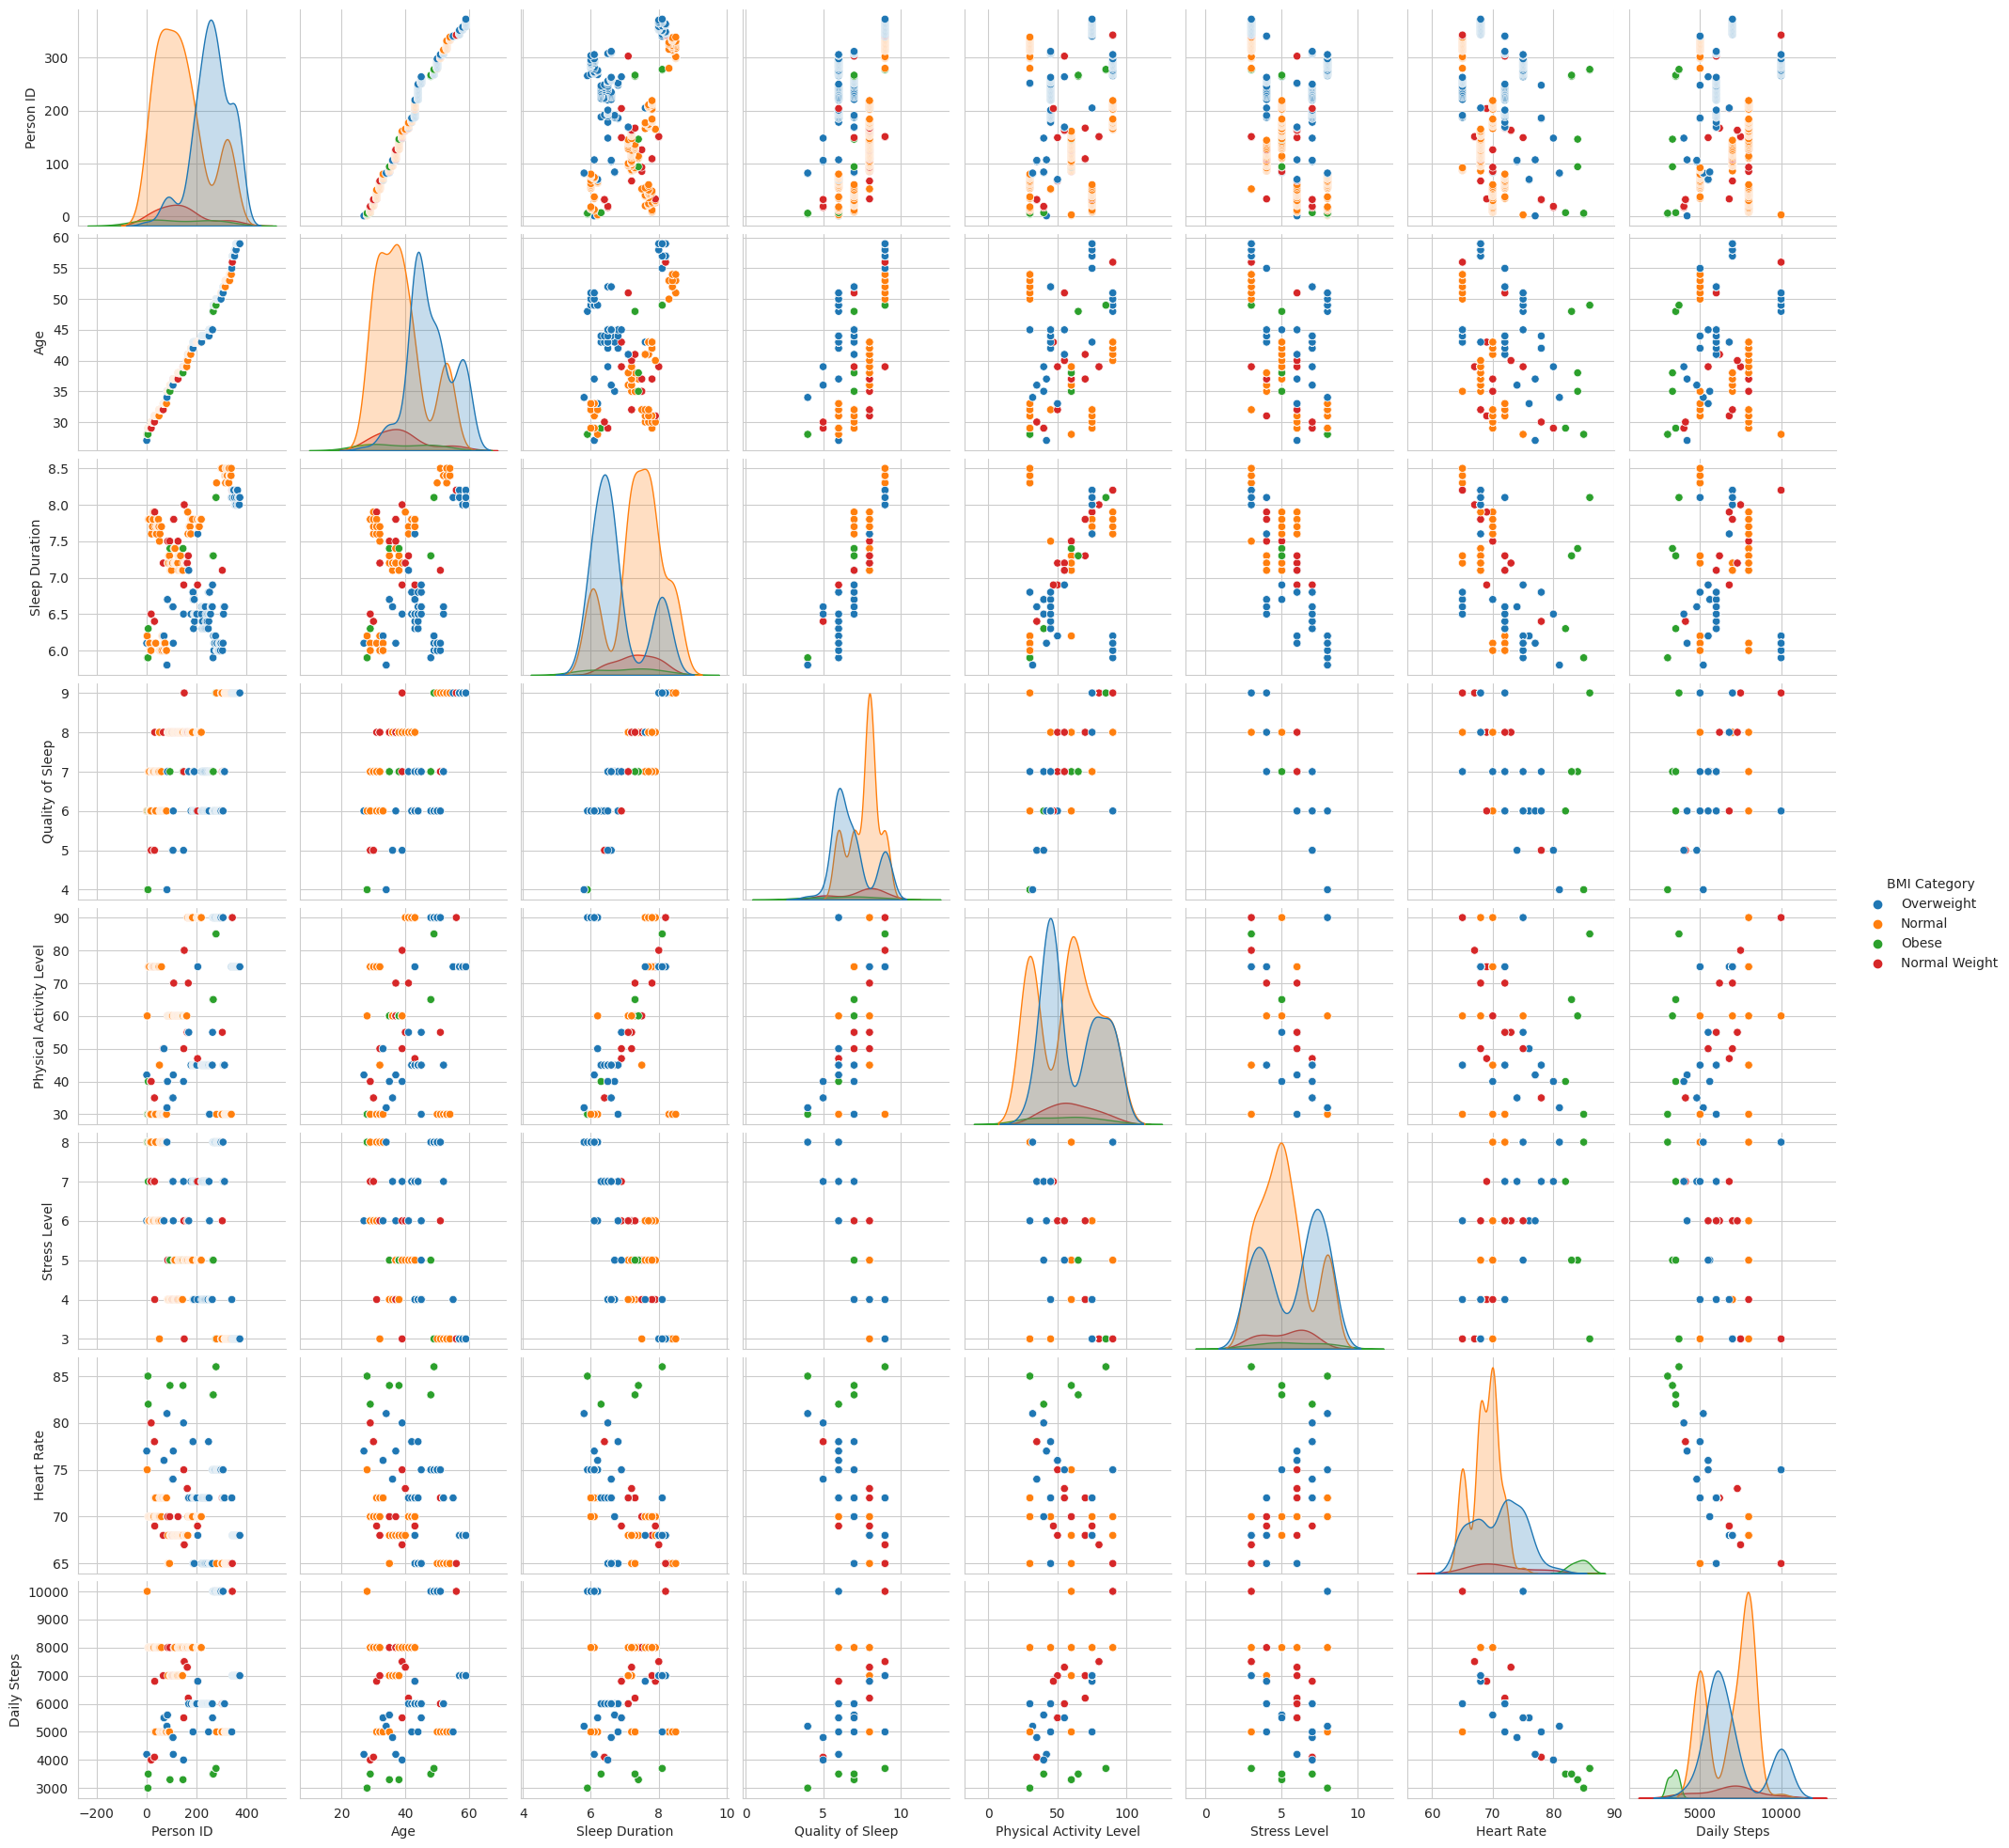

In [25]:
sns.pairplot(df,hue='BMI Category')
plt.show()